In [23]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting, reduction, utils
import os.path

%load_ext autoreload
%autoreload 2
%matplotlib inline

plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading data from /home/berlukas/Documents/workspace/darpa/src/darpa_subt_mapping/fgsp/data/anymal_1_1628289584439754752/data/


/home/berlukas/.local/lib/python3.6/site-packages/PyGSP-0.5.1-py3.6.egg/pygsp/plotting.py:98: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(<Figure size 720x360 with 1 Axes>,
 <Axes3DSubplot:title={'center':'Graph(n_vertices=181, n_edges=1390)'}>)

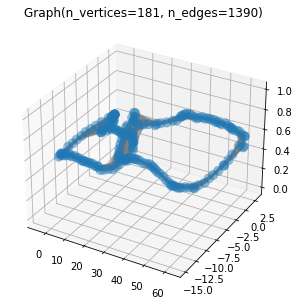

In [28]:
dataroot = '/home/berlukas/Documents/workspace/darpa/src/darpa_subt_mapping/fgsp/data/'
datasets = ['anymal_1_1628289584439754752/data/']

n_datasets = len(datasets)
opt_signals = []
est_signals = []
opt_trajectory = []
est_trajectory = []
est_raw_trajectory = []
opt_graph_coords = []
opt_graph_adj = []
est_graph_coords = []
est_graph_adj = []
features = []
for ds in datasets:
    ds_path = dataroot + ds 
    print(f'Loading data from {ds_path}')
    opt_signal_path = ds_path + 'opt_signal.npy'
    opt_traj_path = ds_path + 'opt_trajectory.npy'
    est_signal_path = ds_path + 'est_signal.npy'
    est_traj_path = ds_path + 'est_trajectory.npy'  
    est_raw_traj_path = ds_path + 'est_raw_trajectory.npy'  
    opt_graph_coords_path = ds_path + 'opt_graph_coords.npy'
    opt_graph_adj_path = ds_path + 'opt_graph_adj.npy'
    est_graph_coords_path = ds_path + 'est_graph_coords.npy'
    est_graph_adj_path = ds_path + 'est_graph_adj.npy'
    features_path = ds_path + 'features.npy'
 
    if os.path.isfile(opt_signal_path) and os.path.isfile(est_signal_path):
        opt_signals.append(np.load(opt_signal_path))
        est_signals.append(np.load(est_signal_path))
    else:
        print(f'Signal files are not available:')
        print(f'Opt file: {opt_signal_path}')
        print(f'Est file: {est_signal_path}')
        
    if os.path.isfile(opt_traj_path) and os.path.isfile(est_traj_path) and os.path.isfile(est_raw_traj_path):
        opt_trajectory.append(np.load(opt_traj_path))
        est_trajectory.append(np.load(est_traj_path))
        est_raw_trajectory.append(np.load(est_raw_traj_path))
    else:
        print(f'Trajectory files are not available.')
        print(f'Opt file: {opt_traj_path}')
        print(f'Est file: {est_traj_path}')
        print(f'Est raw file: {est_raw_traj_path}')
    
    if os.path.isfile(opt_graph_coords_path) and os.path.isfile(opt_graph_adj_path):
        opt_graph_coords.append(np.load(opt_graph_coords_path))
        opt_graph_adj.append(np.load(opt_graph_adj_path))
    else:
        print(f'Opt Graph files are not available.')
        print(f'Coords file: {opt_graph_coords_path}')
        print(f'Adj file: {opt_graph_adj_path}')
        
    if os.path.isfile(est_graph_coords_path) and os.path.isfile(est_graph_adj_path):
        est_graph_coords.append(np.load(est_graph_coords_path))
        est_graph_adj.append(np.load(est_graph_adj_path, allow_pickle=True))
    else:
        print(f'Est Graph files are not available.')
        print(f'Coords file: {est_graph_coords_path}')
        print(f'Adj file: {est_graph_adj_path}')
        
    if os.path.isfile(features_path):
        features.append(np.load(features_path))
    else:
        print(f'Features are not available: {features_path}')
print(f'=======================================')
graph_per_dataset = []
for i in range(0, n_datasets):
    adj_symmt = utils.symmetrize(opt_graph_adj[i], method='average')
    G = graphs.Graph(adj_symmt)
    G.set_coordinates(opt_graph_coords[i][:, 0:3])
    G.compute_fourier_basis()
    graph_per_dataset.append(G)

graph_per_dataset[0].plot()

In [30]:
levels = 3
Gs = reduction.graph_multiresolution(graph_per_dataset[0], levels, sparsify=False)


In [36]:
def reduce_to_the_next_level(G):
    indices =  np.arange(0, G.N, 2)
    G_next = reduction.kron_reduction(G, indices)
    return G_next
    
G0 = graph_per_dataset[0]
G1 = reduce_to_the_next_level(G0)
G2 = reduce_to_the_next_level(G1)

print(f'G0: {G.N}, G1: {G1.N}, G2: {G2.N}')

G0: 181, G1: 91, G2: 46


array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180])